###Importing libraries

In [ ]:
#Data manipulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Importing the dataset

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Hamoye internship/regression/energydata_complete.csv')

#making a copy of the dataset
df1 = df.copy()
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


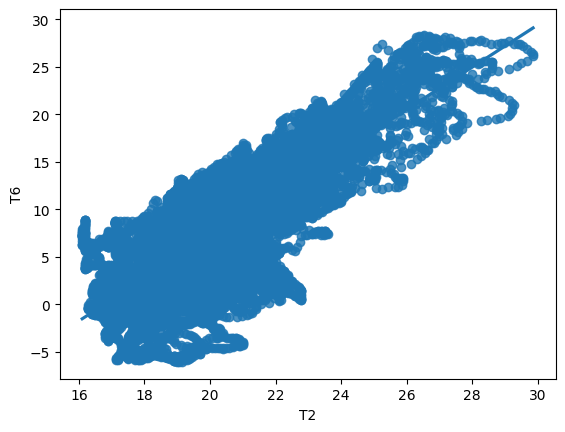

In [ ]:
#fitting a linear regression
sns.regplot(data = df, x = 'T2', y = 'T6')
plt.show()

### Plotting a simple linear linear regression

**Defining the X and Y variable**

In [ ]:
#assigning the x and y variables
x = df['T2']
y = df['T6']

**Initializing and fitting the model**

In [ ]:
#initializing the linear regression model
model = LinearRegression()

#fitting the model on the data
model.fit(x.array.reshape(-1,1),y.array.reshape(-1,1))

LinearRegression()

**Getting the r-squared of the model**

In [ ]:
print('rsquared: ', model.score(x.array.reshape(-1,1),y.array.reshape(-1,1)))

rsquared:  0.6418990830855493


## Multi Linear Regression

#### Dropping the date and light column

In [ ]:
#dropping columns
df = df.drop(['date', 'lights'], axis = 1)
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**Scaling the datar**

In [ ]:
#initializing the scaler
scaler = MinMaxScaler()
#scaling the data
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#### Defining the dependent and independent variable

In [ ]:
#defining the dependent and independent variable
x = scaled_df.drop(['Appliances'], axis = 1)
y = scaled_df.pop('Appliances')
x.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


**Splitting the dataset**

In [ ]:
#splitting the dataset
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,0.497360,0.236767,0.122850,0.565939,0.373878,0.303474,0.476577,0.264760,0.408027,0.159533,...,0.475893,0.376380,0.168810,0.862791,0.776316,0.142857,0.984615,0.192308,0.724554,0.724554
2453,0.286167,0.482616,0.188999,0.669978,0.217957,0.735317,0.270270,0.691421,0.178691,0.333576,...,0.240375,0.703504,0.262594,0.836434,0.807018,0.142857,0.600000,0.342383,0.864041,0.864041
9152,0.422386,0.230529,0.057427,0.606430,0.373878,0.338059,0.414414,0.236449,0.378404,0.151639,...,0.468262,0.409803,0.110397,0.853488,0.859649,0.095238,0.917949,0.158371,0.499502,0.499502
12694,0.560718,0.446840,0.280834,0.704002,0.514290,0.515189,0.540541,0.486556,0.509317,0.424604,...,0.561915,0.340784,0.444802,0.559690,0.750000,0.119048,0.384615,0.558069,0.323173,0.323173
16952,0.835269,0.422071,1.000000,0.318493,0.745383,0.459106,0.900901,0.516432,0.748845,0.455819,...,0.854318,0.633278,0.849946,0.530233,0.355263,0.142857,0.600000,0.787330,0.341060,0.341060


In [ ]:
# #scaling the dataset
# x_train1 = scaler.fit_transform(x_train)
# x_test1 = scaler.transform(x_test)

In [ ]:
# #changing it to a dataframe
# x_train_scaled = pd.DataFrame(x_train1, columns= x_train.columns)
# x_train_scaled.head()

In [ ]:
#changing it to a dataframe
# x_test_scaled = pd.DataFrame(x_test, columns= x_test.columns)
# x_test_scaled.head()

### Fitting a linear regression model

In [ ]:
model1 = LinearRegression()

In [ ]:
#fitting the model
model1.fit(x_train, y_train)
#making predictions on the model
pred = model1.predict(x_test)
print(pred)

[0.03322207 0.24411599 0.03400024 ... 0.06844707 0.10032325 0.05722198]


**Getting MAE**

In [ ]:
#getting the MAE
error = mean_absolute_error(y_test, pred)
print(error)

0.05013362397742955


**Getting SSE**

In [ ]:
#getting the residuals
rss = np.sum(np.square(y_test - pred))
print(rss)

45.34762967266377


**Getting rmse**

In [ ]:
#calculating rmse of the model
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(rmse)

0.0875144494766171


### Ridge Regression

In [ ]:
#fitting a ridge regression model
mode11 = Ridge(alpha=0.4)
mode11.fit(x_train, y_train)


Ridge(alpha=0.4)

**Making predictions on the test data**

In [ ]:
#making predictions using the ridge moodel
pred1= mode11.predict(x_test)
print(pred1)

[0.03321872 0.24043824 0.03461337 ... 0.06872351 0.10025536 0.05851175]


**Getting the rmse of the ridge model**

In [ ]:
#calculating the rmse
rmse1 = np.sqrt(mean_squared_error(y_test, pred1))
print(rmse1)

0.08753385704628003


### Fitiing a lasso regression model

In [ ]:
#initializing a lasso model
lasso_reg = Lasso(alpha=0.001)

#fitting a lasso model
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

**Making predictions using lasso model**

In [ ]:
#making predictions on the test data
pred2 = lasso_reg.predict(x_test)
print(pred2)

[0.07370267 0.08143458 0.07716072 ... 0.07792848 0.09034412 0.08359255]


**Calculating the Rmse of the lasso model**

In [ ]:
rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
print(rmse2)

0.09358170467245137


### Getting the weights of the features of the models

In [ ]:
#functions to get weights
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

**Linear regression weights**

In [ ]:
#linear regression model weights
linear_weights = get_weights_df(model1, x_train, 'Linear')
print(linear_weights)

       Features    Linear
0          RH_2 -0.456698
1         T_out -0.321860
2            T2 -0.236178
3            T9 -0.189941
4          RH_8 -0.157595
5        RH_out -0.077671
6          RH_7 -0.044614
7          RH_9 -0.039800
8            T5 -0.015657
9            T1 -0.003281
10          rv1  0.000770
11          rv2  0.000770
12  Press_mm_hg  0.006839
13           T7  0.010319
14   Visibility  0.012307
15         RH_5  0.016006
16         RH_4  0.026386
17           T4  0.028981
18    Windspeed  0.029183
19         RH_6  0.038049
20         RH_3  0.096048
21           T8  0.101995
22    Tdewpoint  0.117758
23           T6  0.236425
24           T3  0.290627
25         RH_1  0.553547


**ridge regression model weights**

In [ ]:
#ridge regression model weights
ridge_weights = get_weights_df(mode11, x_train, 'Ridge')
print(ridge_weights)

       Features     Ridge
0          RH_2 -0.411071
1         T_out -0.262172
2            T2 -0.201397
3            T9 -0.188916
4          RH_8 -0.156830
5        RH_out -0.054724
6          RH_7 -0.045977
7          RH_9 -0.041367
8            T5 -0.019853
9            T1 -0.018406
10          rv1  0.000748
11          rv2  0.000748
12  Press_mm_hg  0.006584
13           T7  0.010098
14   Visibility  0.012076
15         RH_5  0.016152
16         RH_4  0.024579
17           T4  0.027384
18    Windspeed  0.030268
19         RH_6  0.035519
20    Tdewpoint  0.083128
21         RH_3  0.095135
22           T8  0.101028
23           T6  0.217292
24           T3  0.288087
25         RH_1  0.519525


**Lasso regression model weights**

In [ ]:
#lasso regression model weights
lasso_weights = get_weights_df(lasso_reg, x_train, 'Lasso')
print(lasso_weights)

       Features     Lasso
0        RH_out -0.049557
1          RH_8 -0.000110
2            T1  0.000000
3     Tdewpoint  0.000000
4    Visibility  0.000000
5   Press_mm_hg -0.000000
6         T_out  0.000000
7          RH_9 -0.000000
8            T9 -0.000000
9            T8  0.000000
10         RH_7 -0.000000
11          rv1 -0.000000
12           T7 -0.000000
13           T6  0.000000
14         RH_5  0.000000
15           T5 -0.000000
16         RH_4  0.000000
17           T4 -0.000000
18         RH_3  0.000000
19           T3  0.000000
20         RH_2 -0.000000
21           T2  0.000000
22         RH_6 -0.000000
23          rv2 -0.000000
24    Windspeed  0.002912
25         RH_1  0.017880
